<a href="https://colab.research.google.com/github/pquadro/Modello/blob/main/ModelloMatrimonio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tipo dataset: .csv

Variabili:

Variabile,Descrizione,DataType,DataChar
Nome,Nome invitato,str,
Relazione,Familiare/Amico/Amico di famiglia/Altro,str,Categorical
Invitato da,Alessandro/Dorothy/Genitori sposo/Genitori sposa,str,Categorical
Deve essere invitato?,Si/No,bool,Categorical
Voglio che la persona partecipi?,Si/No,bool,Categorical
Probabilita' di partecipare,Bassa/Media/Alta,str,Categorical
Livello di partecipazione,Basso/Medio/Alto,str,Categorical
Risposta,Si/No/NA,bool,Categorical
Numero ospiti aggiuntivi,"0,1,2,3, ...",int,Numerical
Allergie,Si/No,bool,Categorical
Paese di provenienza,"Italia, Inghilterra, ...",str,Categorical

Variabili escluse dall'analisi: Nome

In [ ]:
!pip install pandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

data_path = '/content/drive/MyDrive/MatrimonioDataset.csv'
df = pd.read_csv(data_path)

In [ ]:
# Explore the data

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Nome                              15 non-null     object
 1   Relazione                         15 non-null     object
 2   Invitato da                       15 non-null     object
 3   Deve essere invitato?             15 non-null     object
 4   Voglio che la persona partecipi?  15 non-null     object
 5   Probabilita' di partecipare       15 non-null     object
 6   Livello di partecipazione         15 non-null     object
 7   Risposta                          15 non-null     object
 8   Numero ospiti aggiuntivi          15 non-null     int64 
 9   Allergie                          15 non-null     object
 10  Paese di provenienza              15 non-null     object
dtypes: int64(1), object(10)
memory usage: 1.4+ KB
None


In [ ]:
for col in ['Relazione', 'Invitato da', 'Voglio che la persona partecipi?', 'Livello di partecipazione', 'Numero ospiti aggiuntivi']:
  relationship_counts = df[col].value_counts()
  print(f"\nCount of guests by {col}:")
  print(relationship_counts)


Count of guests by Relazione:
Relazione
Familiare            4
Amico                4
Amico di famiglia    4
Altro                3
Name: count, dtype: int64

Count of guests by Invitato da:
Invitato da
Alessandro        7
Dorothy           6
Genitori sposo    1
Genitori sposa    1
Name: count, dtype: int64

Count of guests by Voglio che la persona partecipi?:
Voglio che la persona partecipi?
Si    12
No     3
Name: count, dtype: int64

Count of guests by Livello di partecipazione:
Livello di partecipazione
Basso    6
Medio    5
Alto     4
Name: count, dtype: int64

Count of guests by Numero ospiti aggiuntivi:
Numero ospiti aggiuntivi
0    10
1     4
2     1
Name: count, dtype: int64


<ipython-input-23-18d2af361b7d>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentages.index, y=percentages.values, ax=ax, palette=sns.color_palette("Set2"))
<ipython-input-23-18d2af361b7d>:30: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(x=percentages.index, y=percentages.values, ax=ax, palette=sns.color_palette("Set2"))
<ipython-input-23-18d2af361b7d>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentages.index, y=percentages.values, ax=ax, palette=sns.color_palette("Set2"))
<ipython-input-23-18d2af361b7d>:30: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns

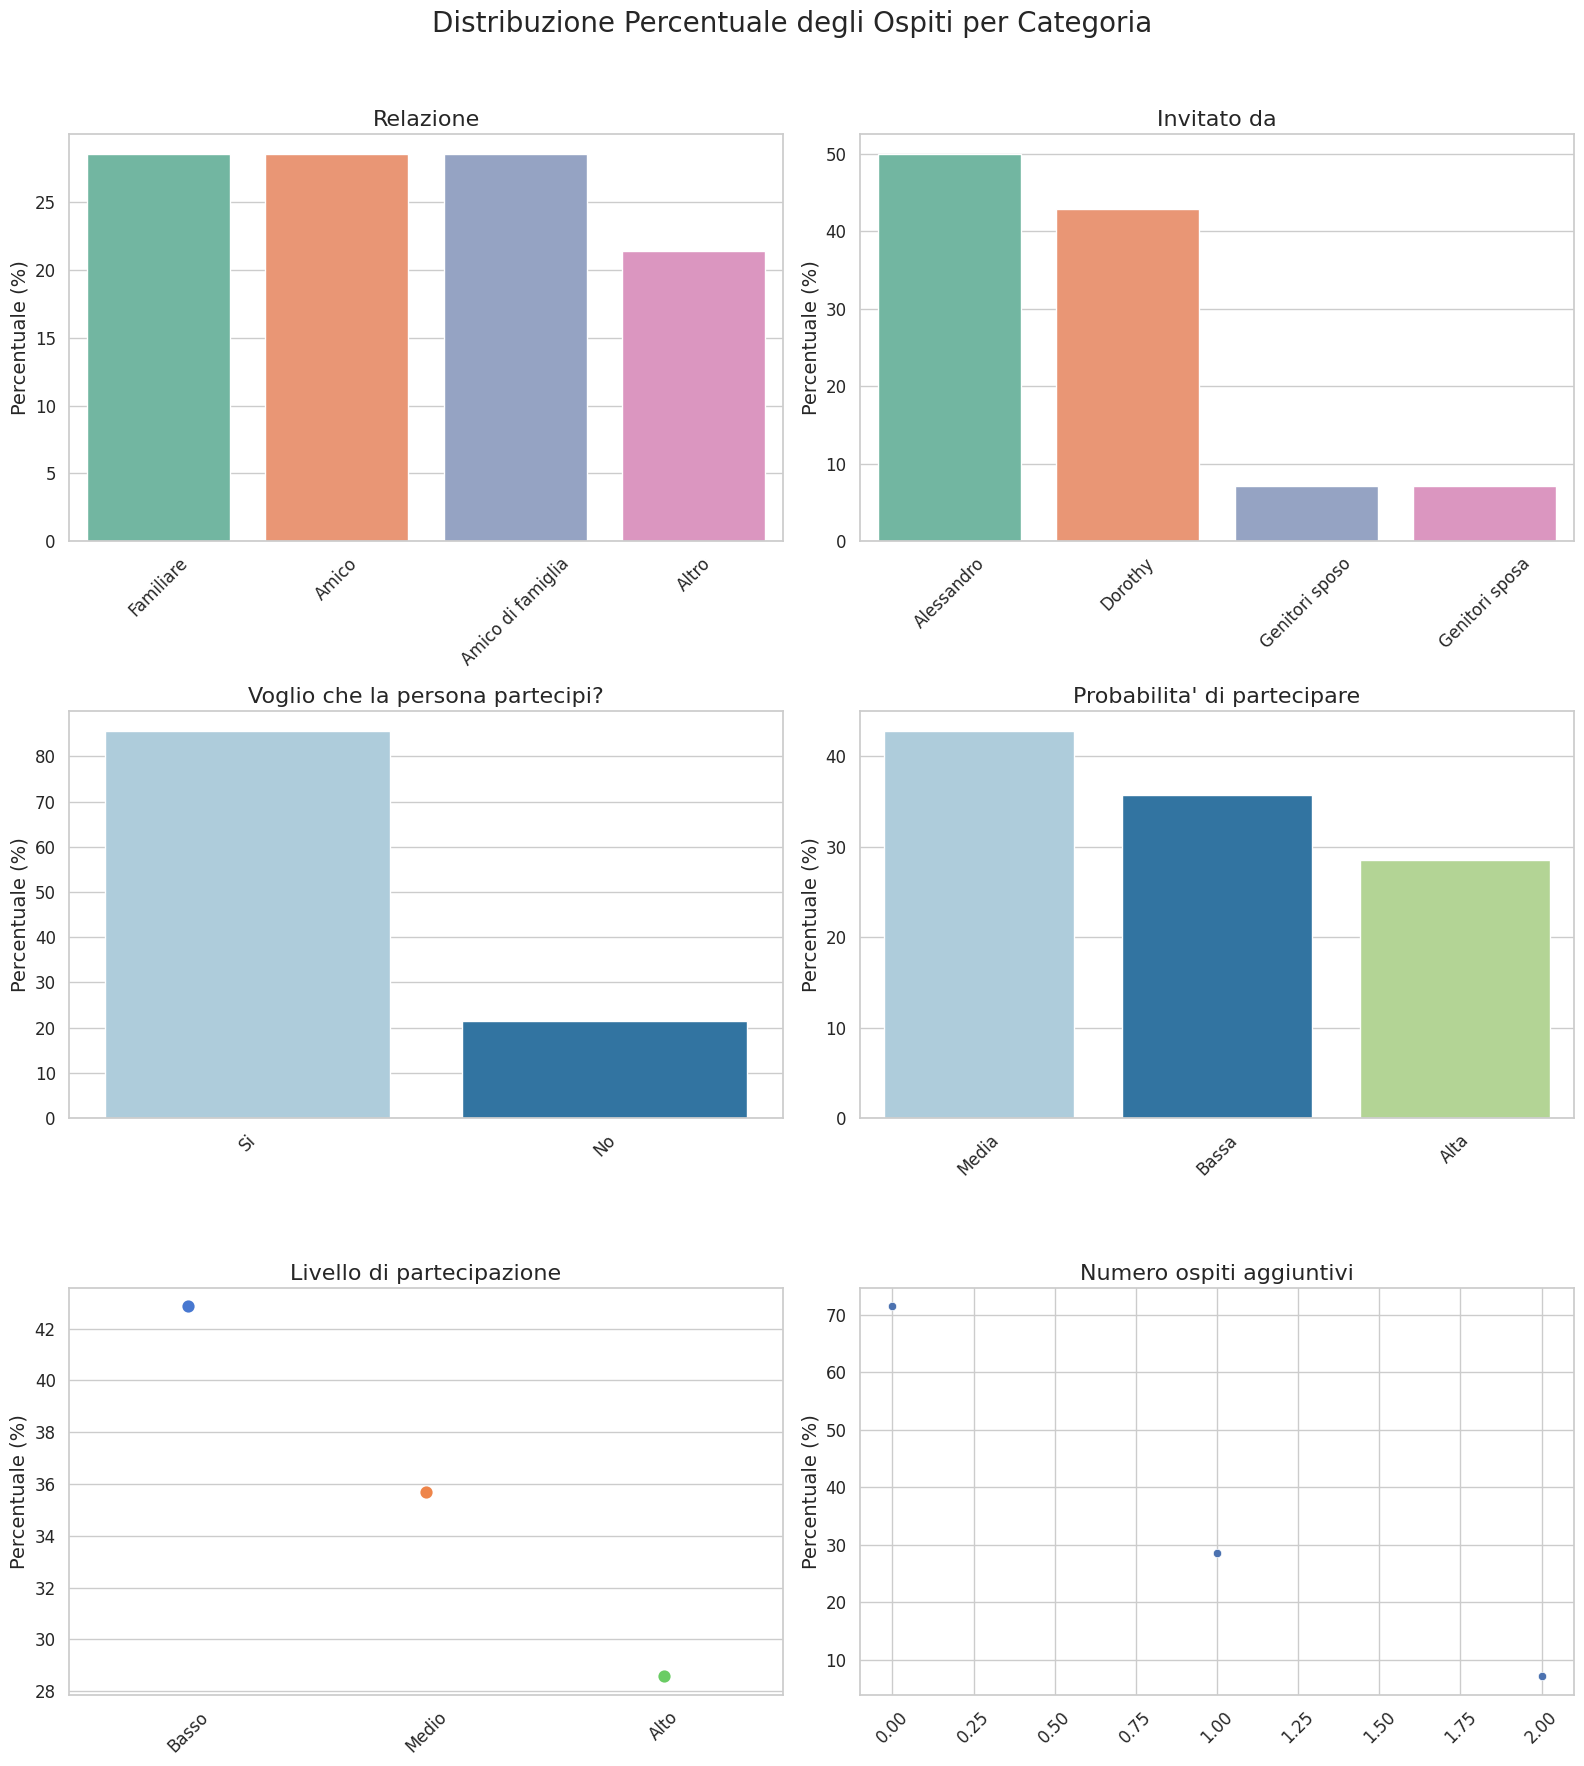

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcola il numero totale di ospiti
total_guests = len(df) - 1  # Conta le righe, escludendo la prima (intestazione)

# Crea un dizionario vuoto per memorizzare le percentuali per ogni colonna
percentages_dict = {}

# Loop attraverso le colonne e calcola le percentuali
for col in ['Relazione', 'Invitato da', 'Voglio che la persona partecipi?', 'Probabilita\' di partecipare', 'Livello di partecipazione', 'Numero ospiti aggiuntivi']:
    # Calcola conteggi delle categorie e percentuali
    category_counts = df[col].value_counts()
    percentages = category_counts / total_guests * 100
    percentages_dict[col] = percentages.round(2)  # Arrotonda le percentuali

# Configura lo stile di Seaborn
sns.set(style="whitegrid")

# Crea una figura con sottotrame (subplots)
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle("Distribuzione Percentuale degli Ospiti per Categoria", fontsize=20)

# Lista di colori per variare le palette
color_palettes = sns.color_palette("Set2", len(percentages_dict))

# Loop attraverso il dizionario delle percentuali e traccia i dati
for ax, (col, percentages), color in zip(axes.flatten(), percentages_dict.items(), color_palettes):
    if col in ['Relazione', 'Invitato da']:
        sns.barplot(x=percentages.index, y=percentages.values, ax=ax, palette=sns.color_palette("Set2"))
        ax.set_title(f'{col}', fontsize=16)
        ax.set_xlabel('')
        ax.set_ylabel('Percentuale (%)', fontsize=14)
        ax.tick_params(axis='x', rotation=45, labelsize=12)
        ax.tick_params(axis='y', labelsize=12)
    elif col in ['Voglio che la persona partecipi?', 'Probabilita\' di partecipare']:
        sns.barplot(x=percentages.index, y=percentages.values, ax=ax, palette=sns.color_palette("Paired"))
        ax.set_title(f'{col}', fontsize=16)
        ax.set_xlabel('')
        ax.set_ylabel('Percentuale (%)', fontsize=14)
        ax.tick_params(axis='x', rotation=45, labelsize=12)
        ax.tick_params(axis='y', labelsize=12)
    elif col == 'Livello di partecipazione':
        sns.pointplot(x=percentages.index, y=percentages.values, ax=ax, palette=sns.color_palette("muted"))
        ax.set_title(f'{col}', fontsize=16)
        ax.set_xlabel('')
        ax.set_ylabel('Percentuale (%)', fontsize=14)
        ax.tick_params(axis='x', rotation=45, labelsize=12)
        ax.tick_params(axis='y', labelsize=12)
    elif col == 'Numero ospiti aggiuntivi':
        sns.scatterplot(x=percentages.index, y=percentages.values, ax=ax, palette=sns.color_palette("husl"))
        ax.set_title(f'{col}', fontsize=16)
        ax.set_xlabel('')
        ax.set_ylabel('Percentuale (%)', fontsize=14)
        ax.tick_params(axis='x', rotation=45, labelsize=12)
        ax.tick_params(axis='y', labelsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


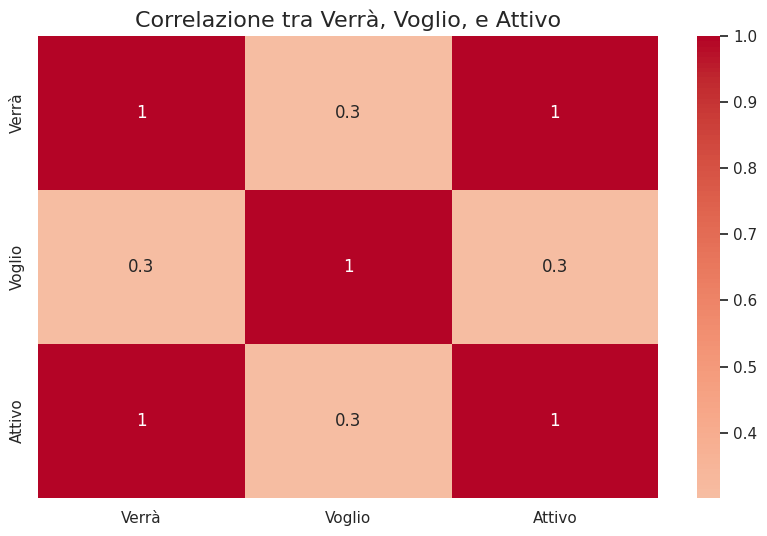

In [ ]:
# Filtrare i dati per chi ha alta probabilità di partecipare
high_prob = df[df["Probabilita' di partecipare"] == 'Alta']

# Filtrare i dati per chi vuoi che partecipi
wanted = df[df["Voglio che la persona partecipi?"] == 'Si']

# Filtrare i dati per chi ha alto livello di partecipazione
active = df[df["Livello di partecipazione"] == 'Alto']

# Creare una colonna per rappresentare chi è in ciascuna categoria
df['Verrà'] = df["Probabilita' di partecipare"] == 'Alta'
df['Voglio'] = df["Voglio che la persona partecipi?"] == 'Si'
df['Attivo'] = df["Livello di partecipazione"] == 'Alto'

# Convertire le colonne booleane in valori numerici
df['Verrà'] = df['Verrà'].astype(int)
df['Voglio'] = df['Voglio'].astype(int)
df['Attivo'] = df['Attivo'].astype(int)

# Grafico delle correlazioni
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Verrà', 'Voglio', 'Attivo']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlazione tra Verrà, Voglio, e Attivo', fontsize=16)
plt.show()



In [ ]:
# Filtrare i dati per persone con alta probabilità di partecipare, che non vuoi, e che avranno livello di partecipazione basso
high_prob_not_wanted_not_active = df[(df["Probabilita' di partecipare"] == 'Alta') &
                                     (df["Voglio che la persona partecipi?"] == 'No') &
                                     (df["Livello di partecipazione"] == 'Basso')]

print("Persone con alta probabilità di venire, che non vuoi e che avranno livello di partecipazione basso:")
print(high_prob_not_wanted_not_active[['Nome', 'Relazione', 'Invitato da', 'Probabilita\' di partecipare', 'Livello di partecipazione']])


Persone con alta probabilità di venire, che non vuoi e che avranno livello di partecipazione basso:
Empty DataFrame
Columns: [Nome, Relazione, Invitato da, Probabilita' di partecipare, Livello di partecipazione]
Index: []


In [ ]:
# Filtrare i dati per persone con bassa probabilità di partecipare, che non vuoi, e che avranno livello di partecipazione basso
low_prob_not_wanted_not_active = df[(df["Probabilita' di partecipare"] == 'Bassa') &
                                    (df["Voglio che la persona partecipi?"] == 'No') &
                                    (df["Livello di partecipazione"] == 'Basso')]

print("Persone con bassa probabilità di venire, che non vuoi e che avranno livello di partecipazione basso:")
print(low_prob_not_wanted_not_active[['Nome', 'Relazione', 'Invitato da', 'Probabilita\' di partecipare', 'Livello di partecipazione']])


Persone con bassa probabilità di venire, che non vuoi e che avranno livello di partecipazione basso:
              Nome          Relazione Invitato da Probabilita' di partecipare  \
4   David Williams  Amico di famiglia  Alessandro                       Bassa   
10   Paul Anderson              Amico  Alessandro                       Bassa   
12  Steven Johnson  Amico di famiglia  Alessandro                       Bassa   

   Livello di partecipazione  
4                      Basso  
10                     Basso  
12                     Basso  


Persone che non vuoi e che hanno un numero di ospiti aggiuntivi superiore a 0:
Empty DataFrame
Columns: [Nome, Relazione, Invitato da, Numero ospiti aggiuntivi]
Index: []


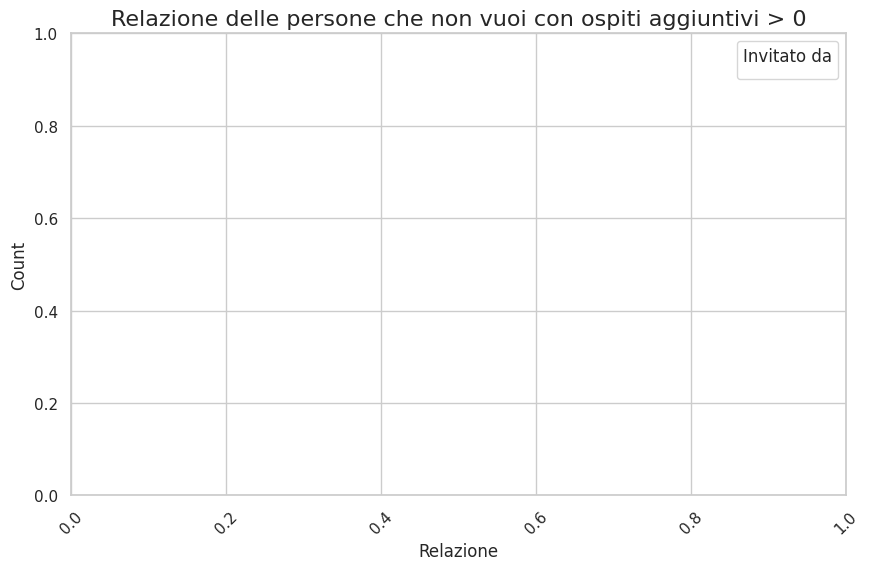

In [ ]:
# Filtrare i dati per persone che non vuoi e che hanno un numero di ospiti aggiuntivi superiore a 0
not_wanted_with_extra_guests = df[(df["Voglio che la persona partecipi?"] == 'No') & (df["Numero ospiti aggiuntivi"] > 0)]

print("Persone che non vuoi e che hanno un numero di ospiti aggiuntivi superiore a 0:")
print(not_wanted_with_extra_guests[['Nome', 'Relazione', 'Invitato da', 'Numero ospiti aggiuntivi']])

# Grafico
plt.figure(figsize=(10, 6))
sns.countplot(x='Relazione', data=not_wanted_with_extra_guests, hue='Invitato da', palette='Set2')
plt.title('Relazione delle persone che non vuoi con ospiti aggiuntivi > 0', fontsize=16)
plt.xlabel('Relazione')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Invitato da')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assicurati di avere i dati correttamente caricati in df

# Filtrare i dati per persone che non vuoi e che hanno un numero di ospiti aggiuntivi superiore a 0
not_wanted_with_extra_guests = df[(df["Voglio che la persona partecipi?"] == 'No') & (df["Numero ospiti aggiuntivi"] > 0)]

# Verifica se ci sono dati validi dopo il filtro
if not_wanted_with_extra_guests.empty:
    print("Nessun dato trovato con i criteri specificati.")
else:
    # Creare una tabella pivot per contare le occorrenze di chi li ha invitati
    pivot_table = pd.pivot_table(not_wanted_with_extra_guests, index='Relazione', columns='Invitato da', aggfunc='size', fill_value=0)

    print("Tabella pivot delle relazioni con ospiti che non vuoi e chi li ha invitati:")
    print(pivot_table)

    # Grafico della tabella pivot solo se ci sono dati validi
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_table, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlazione tra relazione delle persone non volute e chi li ha invitati', fontsize=16)
    plt.xlabel('Invitato da')
    plt.ylabel('Relazione')
    plt.show()


Nessun dato trovato con i criteri specificati.


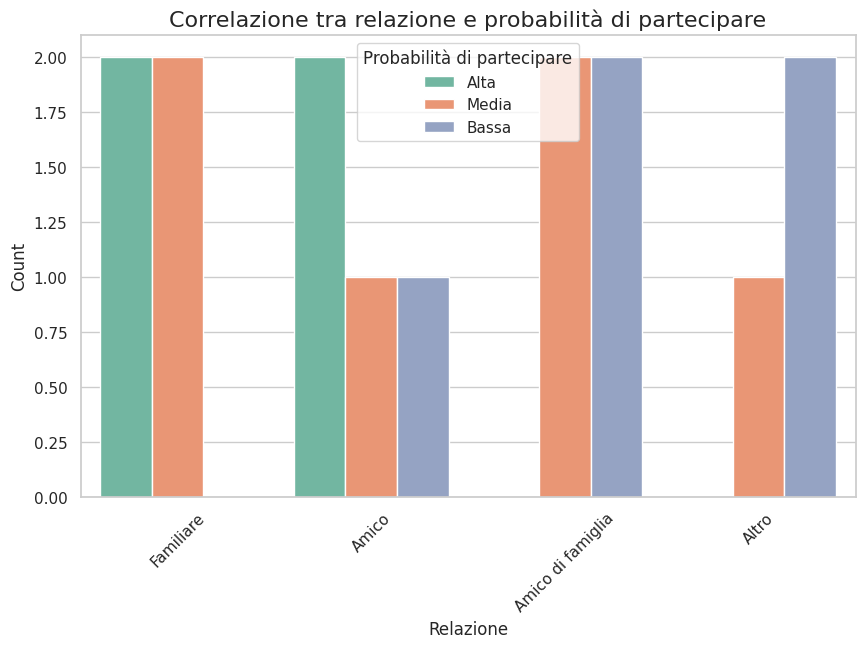

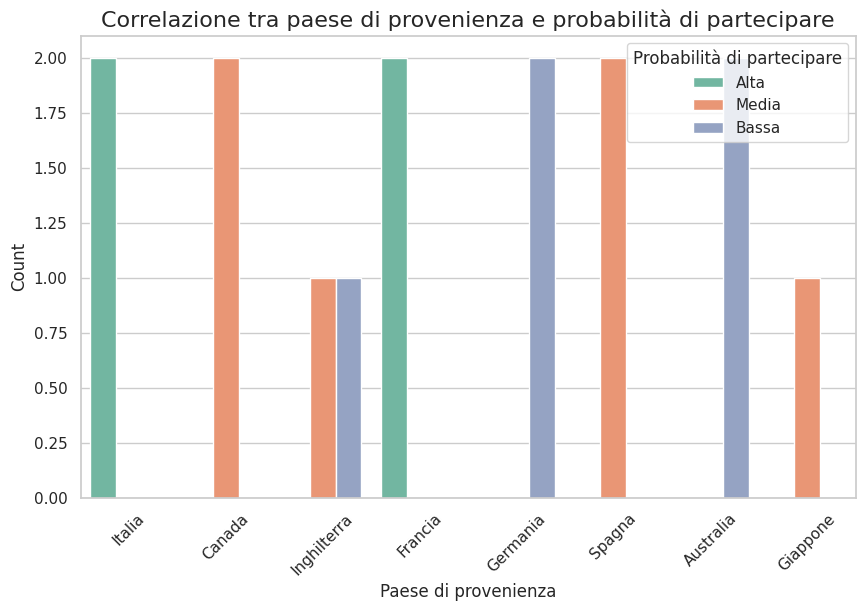

In [ ]:
# Correlazione tra relazione e probabilità di partecipare
plt.figure(figsize=(10, 6))
sns.countplot(x='Relazione', hue='Probabilita\' di partecipare', data=df, palette='Set2')
plt.title('Correlazione tra relazione e probabilità di partecipare', fontsize=16)
plt.xlabel('Relazione')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Probabilità di partecipare')
plt.show()

# Correlazione tra paese e partecipazione
plt.figure(figsize=(10, 6))
sns.countplot(x='Paese di provenienza', hue='Probabilita\' di partecipare', data=df, palette='Set2')
plt.title('Correlazione tra paese di provenienza e probabilità di partecipare', fontsize=16)
plt.xlabel('Paese di provenienza')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Probabilità di partecipare')
plt.show()


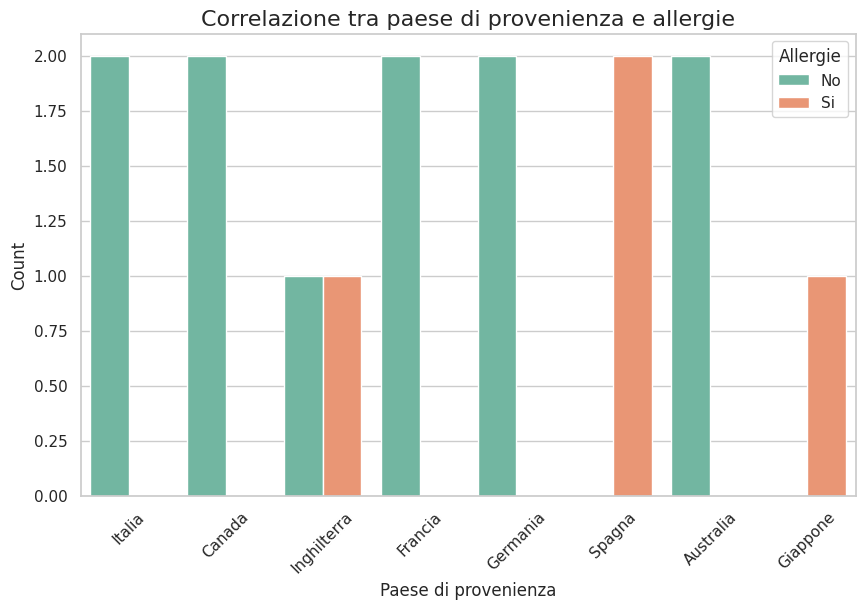

In [ ]:
# Correlazione tra paese e allergie
plt.figure(figsize=(10, 6))
sns.countplot(x='Paese di provenienza', hue='Allergie', data=df, palette='Set2')
plt.title('Correlazione tra paese di provenienza e allergie', fontsize=16)
plt.xlabel('Paese di provenienza')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Allergie')
plt.show()
